## Statistics Reasoning and FDR analysis

Use the data_interactions_1.csv to create linear regression models with and without interactions between the features to regress the ‘sales’. Explain the differences (if any) in the models and state possible reasons for the same.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#! pip install numpy
import numpy as np
import pandas as pd

data_interactions_1=pd.read_csv("/content/drive/Shareddrives/ML&DD/ML Group A1/data_interactions_1.csv")
data_interactions_1

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48
...,...,...,...,...
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36
198,340.32,50.40,79.44,30.60


In [ ]:
x = data_interactions_1[['sales']]
y = data_interactions_1[['youtube','facebook','newspaper']]

In [ ]:
##linear regression models
#! pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
### Linear regression without interaction 
results1 = smf.ols('sales ~ youtube+facebook+newspaper', data=data_interactions_1).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        07:23:18   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5267      0.374      9.422      0.0

In [ ]:
##linear regression models + 2 way interactions 
results2 = smf.ols('sales ~ youtube+facebook+newspaper+youtube*facebook+youtube*newspaper+facebook*newspaper', data=data_interactions_1).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     993.3
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          3.68e-142
Time:                        07:23:21   Log-Likelihood:                -303.96
No. Observations:                 200   AIC:                             621.9
Df Residuals:                     193   BIC:                             645.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.7522      0

In [ ]:
##linear regression models with 3 way interactions 
results3 = smf.ols('sales ~ youtube+facebook+newspaper+youtube*facebook*newspaper', data=data_interactions_1).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     847.3
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          1.16e-140
Time:                        07:23:24   Log-Likelihood:                -303.92
No. Observations:                 200   AIC:                             623.8
Df Residuals:                     192   BIC:                             650.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In the model without any interaction, we discover that youtube and facebook are significant at any significance level even though newspaper is insignificant. 

When we consider the interaction, the R-squared of the model improved from 0.897 to 0.969. As the R-squared is the proportion of variation in Y explained by the model, it means that 96.9% of the variation in Sales is explained by the model. The remaining 3.1% is unexplained. Also, in this case, adj R-squared is increased from 0.896 to 0.968. Based on higher R-squared and adj R-squared values, the regression model with interaction terms has a better fit.

The improvement shows that there exists interaction and the p-value of the interaction between youtube and facebook is less than 0.01 which is significant at the 99% significance level. There is siginificant interaction between youtube and newspaper. There is no interaction between facebook and newspaper since the p-value is insignificant.

For three ways interaction model, the p-value of the interaction term (youtube, facebook, and newspaper) is 0.778. Since it is bigger than alpha 0.05, it is insignificant. It means there is no combined effect of three channels on sales. But this model has the same R-squared and adj R-squared when comparing to two ways interaction model. 

Significant continuous interaction means that the slope of one continuous variable on the response variable changes as the values on a second continuous change. Therefore, we can conclude that including the interaction terms can improve the model performance. 

Use the data_interactions_2.csv for this part of the assignment. Clean the data as required for the following with any method of your choice: Missing values, Conversion to required format for the model, Eliminating features if necessary. Create linear regression models with and without interactions between the features to regress the ‘mpg’. Explain the differences (if any) in the models and state possible reasons for the same.

In [ ]:
data_interactions_2=pd.read_csv("/content/drive/Shareddrives/ML&DD/ML Group A1/data_interactions_2.csv")
data_interactions_2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
##Missing value
### The column horsepower have missing value in the form of "?"
data_interactions_2.replace("?",np.NaN, inplace=True)
data_interactions_2.isnull().sum()
### The sum of missing value shows there is 6 missing value in the data
### Since we have 397 observations, it's ok to delete the rows with missing value

data_interactions_2_2=data_interactions_2.dropna()
data_interactions_2_2
data_interactions_2_2['horsepower']=pd.to_numeric(data_interactions_2_2["horsepower"])
data_interactions_2_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
###Conversion to required format for the model
### Split "Car name" into the brand name
carname=data_interactions_2_2["car name"].str.split(" ",expand=True)
carbrand= pd.DataFrame(carname[0])
carbrand.columns = ['carbrand']
data_interactions_2_3 = pd.concat([data_interactions_2_2,carbrand],axis=1)
### Convert "car name" in to factor variable
carbrand = pd.get_dummies(data_interactions_2_3['carbrand'])
a = data_interactions_2_3['carbrand'].value_counts()
data_interactions_2_3=data_interactions_2_3.rename(columns={'model year':'model_year'})

In [ ]:
### Aggregate the car brand name in to the same category
data_interactions_2_3.carbrand = np.where(data_interactions_2_3.carbrand=='vw', 'volkswagen', data_interactions_2_3.carbrand)
data_interactions_2_3.carbrand = np.where(data_interactions_2_3.carbrand=='vokswagen', 'volkswagen', data_interactions_2_3.carbrand)
data_interactions_2_3.carbrand = np.where(data_interactions_2_3.carbrand=='chevy', 'chevrolet', data_interactions_2_3.carbrand)
data_interactions_2_3.carbrand = np.where(data_interactions_2_3.carbrand=='chevroelt', 'chevrolet', data_interactions_2_3.carbrand)
data_interactions_2_3.carbrand = np.where(data_interactions_2_3.carbrand=='toyouta', 'toyota', data_interactions_2_3.carbrand)
data_interactions_2_3.carbrand = np.where(data_interactions_2_3.carbrand=='maxda', 'mazda', data_interactions_2_3.carbrand)

In [ ]:
data_interactions_2_3.carbrand.value_counts()

ford             48
chevrolet        47
plymouth         31
dodge            28
amc              27
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
opel              4
saab              4
subaru            4
renault           3
bmw               2
cadillac          2
mercedes-benz     2
nissan            1
hi                1
capri             1
mercedes          1
triumph           1
Name: carbrand, dtype: int64

In [ ]:
data_interactions_2_3

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name,carbrand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,ford
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,volkswagen
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,ford


In [ ]:
data_interactions_2_3.corr()
### displacement, horsepower and weight are highly correlated 
### If we put all three of the variables into the regression model, it will casue mulitlinearity
### We choose to drop displacement and weight, and consider the horsepower

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
##linear regression models
model_2_1 = smf.ols('mpg ~ cylinders+horsepower+acceleration+model_year+origin+carbrand', data=data_interactions_2_3).fit()
print(model_2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     43.52
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          3.58e-106
Time:                        07:23:45   Log-Likelihood:                -1040.1
No. Observations:                 392   AIC:                             2150.
Df Residuals:                     357   BIC:                             2289.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
#! pip install matplotlib
import matplotlib.pyplot as plt

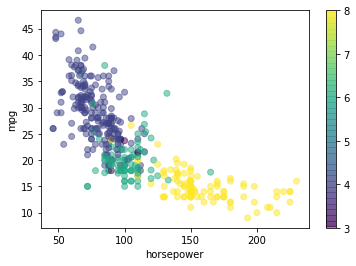

In [ ]:
y=data_interactions_2_3["mpg"]
x=data_interactions_2_3["horsepower"]
c=data_interactions_2_3["cylinders"]
plt.scatter(x, y, c=c, alpha=0.5)
plt.colorbar()
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()
### The sactter plot shows that when cylinder is different the slope of regression between mpg and horespower differs ,condisder the interaction between cylinders and horsepower

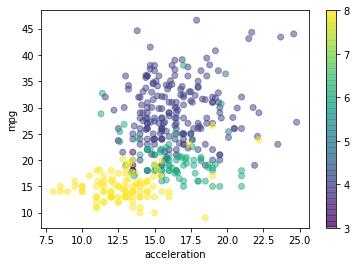

In [ ]:
y=data_interactions_2_3["mpg"]
x=data_interactions_2_3["acceleration"]
c=data_interactions_2_3["cylinders"]
plt.scatter(x, y, c=c, alpha=0.5)
plt.colorbar()
plt.xlabel("acceleration")
plt.ylabel("mpg")
plt.show()
### The sactter plot shows that when cylinder is different the slope of regression between mpg and acceleration differs. Condisder the interaction between cylinders and acceleration

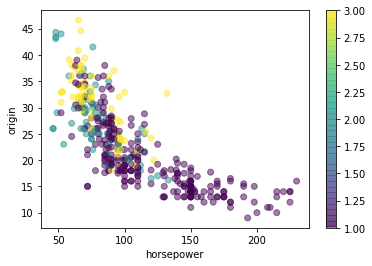

In [ ]:
y=data_interactions_2_3["mpg"]
x=data_interactions_2_3["horsepower"]
c=data_interactions_2_3["origin"]
plt.scatter(x, y, c=c, alpha=0.5)
plt.colorbar()
plt.xlabel("horsepower")
plt.ylabel("origin")
plt.show()
### Not Condisder the interaction between origin and horsepower or acceleration

In [ ]:
##linear regression models + interactions 
model_2_2 = smf.ols('mpg ~ cylinders+horsepower+acceleration+model_year+origin+carbrand+cylinders*horsepower+cylinders*acceleration', data=data_interactions_2_3).fit()
print(model_2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     65.05
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          5.08e-134
Time:                        07:23:59   Log-Likelihood:                -963.77
No. Observations:                 392   AIC:                             2002.
Df Residuals:                     355   BIC:                             2148.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

When comparing to the linear regression model without interaction, the model with interaction has an improved R^squared value from 0.806 to 0.868. It means that 86.8% of the variation in mpg is explained by the model. The remaining 13.2% is unexplained. Also, in this case, adj R-squared is increased from 0.787 to 0.855. Based on higher R-squared and adj R-squared values, the regression model with interaction terms has a better fit.

The improvements show that there exsists interaction between cylinders and horsepower (the p-value of the interaction terms is less than 0.01) which is significant at the 99% significance level.

The result indicates that when horsepower is influencing the mpg, the level of influence is changed when having different number of cylinders. When car equiped more cylinders and with higher horsepower the mpg increases.

# Question 3

Create a Logistic Regression model on the diabetes data set to identify if a patient has diabetes (‘Outcome’ column in the data set).

In [ ]:
diabetes =pd.read_csv("/content/drive/Shareddrives/ML&DD/ML Group A1/diabetes.csv")
diabetes 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
### Split the data into training and test dataset. 10% dataset is the test dataset.
from sklearn.model_selection import train_test_split
X = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = diabetes[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)


In [ ]:
### Bulid training logistic model with training dataset
log_reg1 = sm.Logit(y_train, X_train).fit()
log_reg1.summary()
log_reg1.summary2()

Optimization terminated successfully.
         Current function value: 0.604738
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.066     
Dependent Variable:    Outcome            AIC:                851.7477  
Date:                  2022-01-22 07:24   BIC:                888.0528  
No. Observations:      691                Log-Likelihood:     -417.87   
Df Model:              7                  LL-Null:            -447.48   
Df Residuals:          683                LLR p-value:        2.1710e-10
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1445   0.0310  4.6643 0.0000  0.0838  0.2052
Glucose                   0.0143   0.0030  4.8434 0.0000  0.0085  0.0201
BloodPressure            -0.0293   0.0049 -5.9249 0.0000 -0.0390 -0.0196
SkinThickness             0.0012   0.0064  0.1868 0.8518 -0.0113  0.0137
Insulin                   0.0008   0.0008  0.9656 0.3343 -0.0008  0.0024
BMI                      -0.0099   0.0114 -0.8682 0.3853 -0.0323  0.0125
DiabetesPedigreeFunction  0.3829   0.2538  1.5088 0.1314 -0.1145  0.8802
Age                      -0.0214   0.0092 -2.3329 0.0197 -0.0393 -0.0034
========================================================================

"""

Confusion Matrix : 
 [[41 10]
 [15 11]]
Test accuracy =  0.6753246753246753


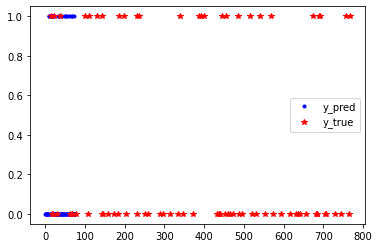

In [ ]:
# performing predictions on the test datdaset
yhat = log_reg1.predict(X_test)
prediction = list(map(round, yhat))
 
# comparing original and predicted values of y

from sklearn.metrics import (confusion_matrix,accuracy_score)
 
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

plt.plot(prediction,"b.", label = "y_pred")   
plt.plot(y_test,"r*", label = "y_true")   
plt.legend()
plt.show() 

The logistic model has 67.5% accuracy of prediction of the test data. Although the accuracy is 67.5%, but for patients turely has diabetes, there is 15/(41+15)=26.78% possiblilty that the prediction is wrong, which might cause serious results.

Create Logistic Regression models on the diabetes data set by performing a stepwise addition of the features. Identify which features are informative towards the classification and write your observations based on the same. Finally, choose the best model and explain your reasons for the same.

In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

def forward_selected(data, response):
  """ This function is modified based on 
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    
    Linear model designed by forward selection.
  """
    
    # Get column names and assign them to "remaining" (unselected variables)
  remaining = set(data.columns)

    # Remove Y from remaining
  remaining.remove(response)

    # Create an empty list to store selected variables
  selected = []

    # Set current AIC score to 1200 and best AIC score to 0
  current_score, best_new_score = 1200.0, 0.0

    # While remaining is not empty and current score >= best score
  while remaining and current_score >= best_new_score:
        
        # Create an empty list for accuracy scores
      scores_with_candidates = []

        # For each candidate variable in the unselected variables, 
        # fit logistic regression on selected variables + candidate
      for candidate in remaining:
          y_train = data[response]
          x_train = data[selected + [candidate]]
          log_reg = sm.Logit(y_train, x_train).fit()
          score = log_reg.aic
  
            # Update the score list with new score and candidate variable
          scores_with_candidates.append((score, candidate))
        
        # Sort the score list in ascending order
      scores_with_candidates.sort(reverse=True)
        # Get the highest score and the corresponding variable
      best_new_score, best_candidate = scores_with_candidates.pop()
        # If current score >= best new score, select this candidate variable
        # remove this variable from remaining
        # Update the current score
      if current_score >= best_new_score:

            # Remove the candidate from remaining
          remaining.remove(best_candidate)

            # Add the candidate to selected
          selected.append(best_candidate)

            # Replace the current score with the best score
          current_score = best_new_score
  return selected

In [ ]:
forward_selected(diabetes, 'Outcome')

Optimization terminated successfully.
         Current function value: 0.654990
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677125
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673876
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690697
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.681407
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.667202
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689269
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671035
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.623697
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654180
  

['BloodPressure', 'Glucose', 'Pregnancies', 'Age', 'DiabetesPedigreeFunction']

In [ ]:
### Choose the best subset
y = diabetes['Outcome']
X_best_set = diabetes[['BloodPressure', 'Glucose', 'Pregnancies', 'Age', 'DiabetesPedigreeFunction']]
### Split the data into training and test dataset. 10% dataset is the test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_best_set, y, test_size=0.1, random_state=2)

log_reg = sm.Logit(y_train, X_train).fit()
log_reg.summary()
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.606195
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.064     
Dependent Variable:    Outcome            AIC:                847.7616  
Date:                  2022-01-22 07:24   BIC:                870.4523  
No. Observations:      691                Log-Likelihood:     -418.88   
Df Model:              4                  LL-Null:            -447.48   
Df Residuals:          686                LLR p-value:        1.1258e-11
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
BloodPressure            -0.0315   0.0043 -7.2546 0.0000 -0.0400 -0.0230
Glucose                   0.0143   0.0026  5.5802 0.0000  0.0092  0.0193
Pregnancies               0.1438   0.0310  4.6446 0.0000  0.0831  0.2045
Age                      -0.0230   0.0091 -2.5326 0.0113 -0.0408 -0.0052
DiabetesPedigreeFunction  0.3850   0.2464  1.5628 0.1181 -0.0978  0.8679
========================================================================

"""

Confusion Matrix : 
 [[42  9]
 [14 12]]
Test accuracy =  0.7012987012987013


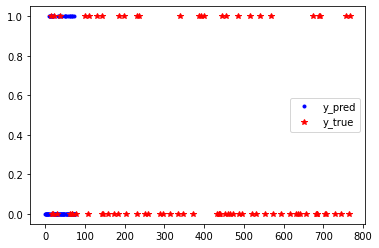

In [ ]:
# performing predictions on the test datdaset
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
 
# comparing original and predicted values of y

from sklearn.metrics import (confusion_matrix,accuracy_score)
 
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

plt.plot(prediction,"b.", label = "y_pred")   
plt.plot(y_test,"r*", label = "y_true")   
plt.legend()
plt.show() 

After forward selection, 'BloodPressure', 'Glucose', 'Pregnancies', 'Age' and 'DiabetesPedigreeFunction' are identified as informative. Adding more variables to the model didn't further decrease the AIC score. 
Compared with the previous training model, the AIC score decreased from 851.7477 to 847.7616, and the predict accuracy increased from 67.5% to 70.13% which means the reduced model with forward stepwise is better for diabetes prediction.

The model function is:
$P(Y = 1|X) = \frac{exp(-0.0315 BloodPressure + 0.0143 Glucose + 0.1438 Pregnancies - 0.0230 Age + 0.3850 DiabetesPedigreeFunction)}{1+exp(-0.0315 BloodPressure + 0.0143 Glucose + 0.1438 Pregnancies - 0.0230 Age + 0.3850 DiabetesPedigreeFunction)}$

The p-values for Glucose, BMI, Age and Pregnancies are statistically significant at 5% significance levels.


Does the FDR ('False Significance') have impact on any of the above created models? Give appropriate reasoning for your conclusions.

You could use any methods/plots as you like as long as you provide a reasonable argument. Just an explanation as to why it affects/doesn't affect should be good enough.
Explain if FDR matters for all 3 models created (2 Linear, 1 Logistic)

In [ ]:
import numpy as np
import pandas as pd
from pprint import pprint
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import rankdata

In [ ]:
#q=false discovery rate
#m=total number of tests

def fdr_cut_plot(pvals):
  pvals = np.array(pvals)
  q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  rank_pvals = rankdata(pvals)
  m = len(pvals)
  cut = []
  for i in q: 
    alpha = max(pvals[pvals<=(i*rank_pvals/m)])
    cut.append(alpha)
  
  plt.plot(q,cut,'o-', color= 'b')
  plt.xlabel("q=false discovery rate")
  plt.ylabel("p-value cuttoff")
  plt.show()
  print('number of variables', m)
  return cut

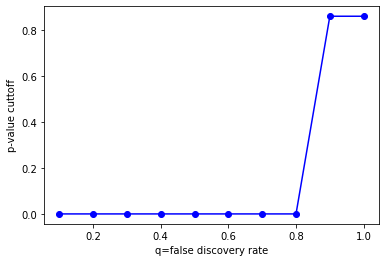

number of variables 4


[1.2672945051315677e-17,
 1.2672945051315677e-17,
 1.2672945051315677e-17,
 1.2672945051315677e-17,
 1.2672945051315677e-17,
 1.2672945051315677e-17,
 1.2672945051315677e-17,
 1.2672945051315677e-17,
 0.8599150500805985,
 0.8599150500805985]

In [ ]:
#MODEL1: Q1 linear regression model without interaction
fdr_cut_plot(results1.pvalues)
### Until q value becomes 0.8, there is no change of p-value cutoff. So we can conclude that fdr does not impact on it. 

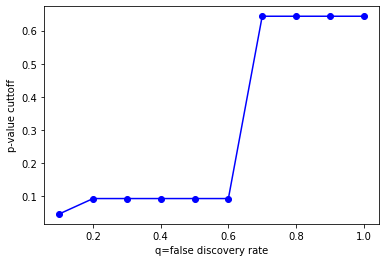

number of variables 7


[0.045962166895833385,
 0.09239922347982041,
 0.09239922347982041,
 0.09239922347982041,
 0.09239922347982041,
 0.09239922347982041,
 0.6432918002182821,
 0.6432918002182821,
 0.6432918002182821,
 0.6432918002182821]

In [ ]:
#MODEL2: Q1 linear regression model with 2 ways interaction
fdr_cut_plot(results2.pvalues)
### There seems slightly more impact affected by fdr when comparing to the previous linear regression model without interaction.

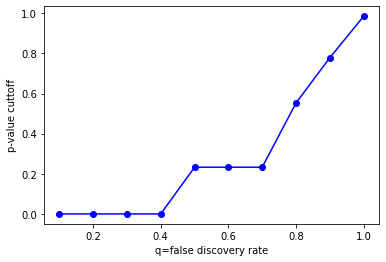

number of variables 8


[9.950843532261533e-12,
 9.950843532261533e-12,
 9.950843532261533e-12,
 9.950843532261533e-12,
 0.2327548095627588,
 0.2327548095627588,
 0.2327548095627588,
 0.5527913205747357,
 0.778389316120172,
 0.9850522171255566]

In [ ]:
#MODEL3: Q1 linear regression model with 3 ways interaction
fdr_cut_plot(results3.pvalues)
### It has a strong impact affected by fdr because of the increased number of variables (when comparing to two previous models).

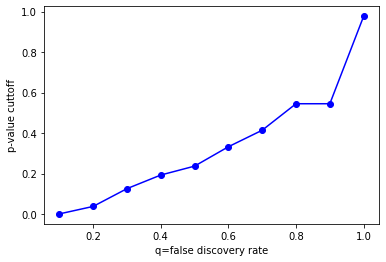

number of variables 36


[0.0005122710813303854,
 0.03749877119522976,
 0.12526943950983443,
 0.19255309865021694,
 0.23660442164307688,
 0.3323427351562218,
 0.41397455533572847,
 0.544817130049758,
 0.544817130049758,
 0.9770374220579898]

In [ ]:
#MODEL4: Q2 linear regression model without interaction
fdr_cut_plot(model_2_1.pvalues)
### It has a strong impact affected by fdr because of a large number of variables (42). 

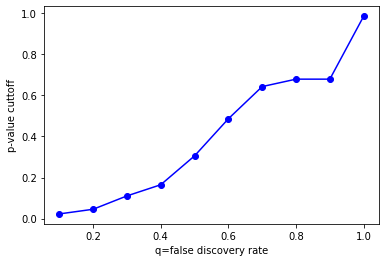

number of variables 38


[0.02279385421679688,
 0.045439352246257156,
 0.11048407668932679,
 0.16481124005486775,
 0.305386657354557,
 0.48606660083078324,
 0.6427326475599499,
 0.6788911819102312,
 0.6788911819102312,
 0.9851509061800091]

In [ ]:
#MODEL5: Q2 linear regression model with interaction
fdr_cut_plot(model_2_2.pvalues)
### It has a strong impact affected by fdr because because of a large number of variables (44).

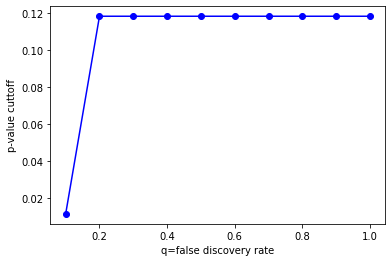

number of variables 5


[0.011321090561436754,
 0.11809141465902173,
 0.11809141465902173,
 0.11809141465902173,
 0.11809141465902173,
 0.11809141465902173,
 0.11809141465902173,
 0.11809141465902173,
 0.11809141465902173,
 0.11809141465902173]

In [ ]:
#MODEL6: Q3 logistic regression model 
fdr_cut_plot(log_reg.pvalues)
### It doesn't have a strong impact affected by fdr because of a small number of variables.

In [ ]:
'''
Goal: how to apply the False Discovery Rate (FDR) formula in Python
FDR = Benjamini-Hochberg procedure
The purpose of the FDR adjustment is for when you have thousands of p values, it will allow you to determine the subset of p-values for which you are even more confident there is no Type 1 (false positive) error made.
Formula: p_val*len_p_val_list/rank
'''
def fdr_adj_P(model):
  p_val_list = np.array(model.pvalues)
  # now perform the FDR adjustment
  # start by sorting the list asc
  p_val_list.sort()

  # next, assign a rank to each item in list, start at 1
  rank = 1
  len_p_val_list = len(p_val_list)
  p_adj_list = []
  for p in p_val_list:
      fdr_adj_p_val = p*len_p_val_list/rank
      rank += 1
      p_adj_list.append(
          {
              "p_val": p,
              "fdr_adj_p_val": fdr_adj_p_val
          }
      )

  result = pd.DataFrame(p_adj_list)

  from matplotlib import pyplot
  bins = len(p_adj_list)

  pyplot.hist(result['p_val'], bins, alpha=0.5, label='p_val')
  pyplot.hist(result['fdr_adj_p_val'], bins, alpha=0.5, label='fdr_adj_p_val')
  pyplot.legend(loc='upper right')
  pyplot.show()

### An FDR adjusted p-value (or q-value) of 0.05 implies that 5% of significant tests will result in false positives. The latter will result in fewer false positives.

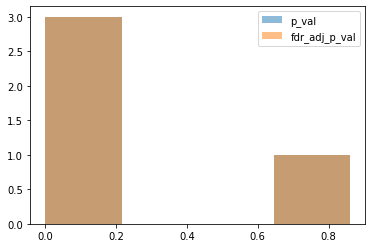

In [ ]:
#MODEL1: Q1 linear regression model without interaction
fdr_adj_P(results1)
### The original p-value does not change much when apply the BH method to calculate FDR adjusted p-value.
### We can conclude that the linear regression model without interaction is not strongly affected by FDR.

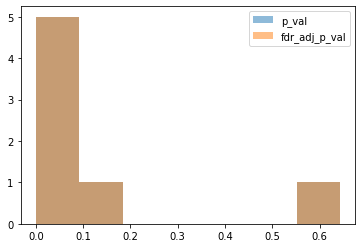

In [ ]:
#MODEL2: Q1 linear regression model with 2 ways interaction
fdr_adj_P(results2)
### The original p-value does not change much when apply the BH method to calculate FDR adjusted p-value.
### We can conclude that the linear regression model with 2 ways interaction is not strongly affected by FDR.

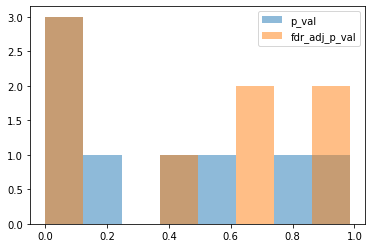

In [ ]:
#MODEL3: Q1 linear regression model with 3 ways interaction
fdr_adj_P(results3)
### The adjusted p-value increased the model has more p-value grows larger than 0.05/0.01 which indicates that if we use the original p-value, there might exist FDR problems.
### We can conclude that the linear regression model with 3 ways interaction is affected by FDR.

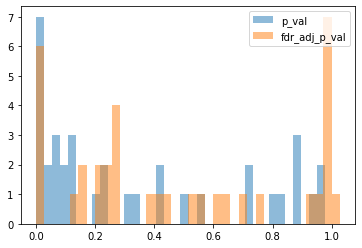

In [ ]:
#MODEL4: Q2 linear regression model without interaction
fdr_adj_P(model_2_1)
### The adjusted p-value increased the model has more p-value grows larger than 0.05/0.01 which indicates that if we use the original p-value, there might exists FDR problems.
### We can conclude that the linear regression model without interaction in Q2 is affected by FDR.

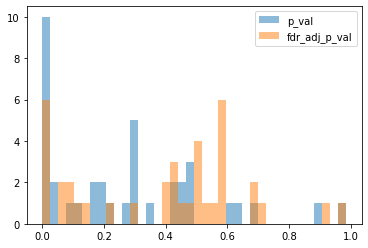

In [ ]:
#MODEL5: Q2 linear regression model with interaction
fdr_adj_P(model_2_2)
### The adjusted p value increased the model has more p-value grows larger than 0.05/0.01 which indicates that if we use the original p-value, there might exists FDR problems.
### We can conclude that the linear regression model with interaction in Q2 is strongly affected by FDR.

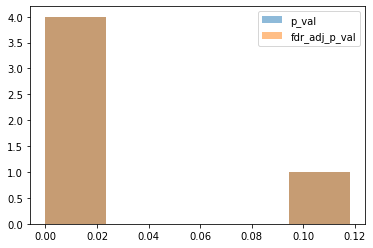

In [ ]:
#MODEL6: Q3 logistic regression model 
fdr_adj_P(log_reg)
### The original p-value not change much when apply the BH method to calculate FDR adjusted p-value.
### We can conclude that the logistic regression model is not strongly affected by FDR.

When we set up 𝛼 as 5% for every single regressor test, the probability of falsely rejecting null (deeming the regressor as significant even though it is not actually significant) is 5%. We can say that it is type I error.

False discoveries occur when we wrongfully reject the null hypothesis. Through the plots and charts that we drew, we can conclude that FDR has impact on some of our models with a large number of regressors.

